In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Kaggle/train/train.csv")

In [3]:
df["Dates"]= pd.to_datetime(df["Dates"])

In [4]:
for column in df.columns:
    print("Unique in " + column + ":" + str(df[column].nunique()))

Unique in Dates:389257
Unique in Category:39
Unique in Descript:879
Unique in DayOfWeek:7
Unique in PdDistrict:10
Unique in Resolution:17
Unique in Address:23228
Unique in X:34243
Unique in Y:34243


In [5]:
crime_cnt = df.groupby("Category")["Category"].count().sort_values(ascending=0)

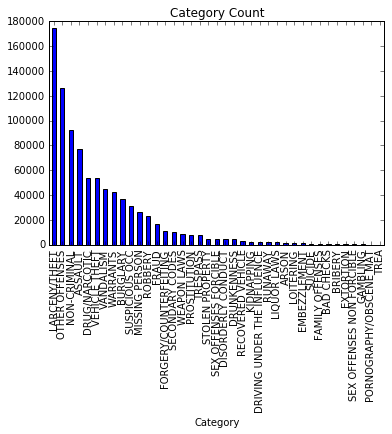

In [6]:
crime_cnt.plot(kind='bar', title='Category Count')

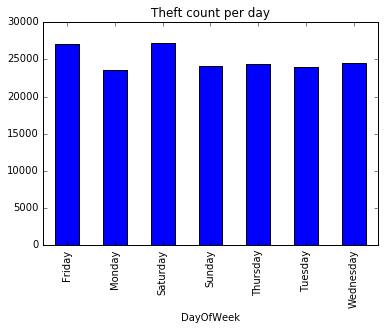

In [7]:
df_theft = df[df["Category"]== "LARCENY/THEFT"]
theft_grp = df_theft.groupby("DayOfWeek")["Category"].count()
theft_grp.plot(kind='bar', title='Theft count per day')

In [8]:
dayOfWeekVars = pd.DataFrame(columns=["Category", "CoeffVar"])
rows=[]
for c in df["Category"].unique():
    dfSubset = df[df["Category"] == c]
    if(len(dfSubset > 300)):
        dfSubsetGrp = dfSubset.groupby('DayOfWeek')["Category"].count()
        std = dfSubsetGrp.std()
        mean = dfSubsetGrp.mean()
        cv = std / mean
        rows.append({'Category': c, 'CoefficientOfVariation': cv})    


In [9]:
categoryDayCV = pd.DataFrame(rows).sort_values(by = 'CoefficientOfVariation', ascending = 0)

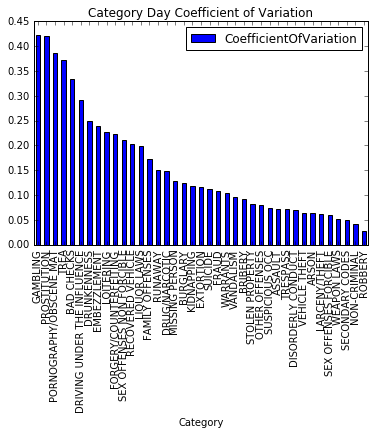

In [10]:
categoryDayCV.plot(x='Category', kind='bar', title='Category Day Coefficient of Variation')

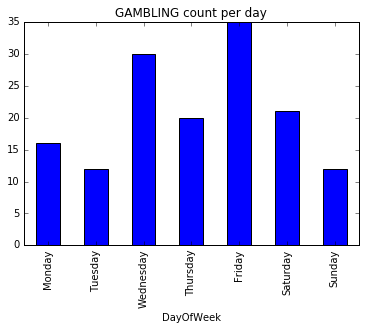

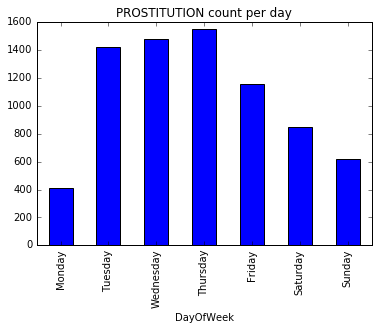

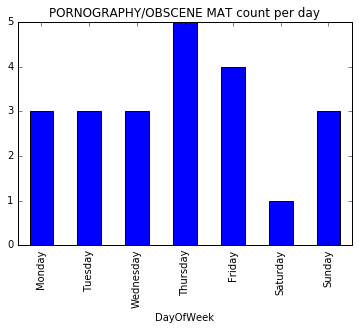

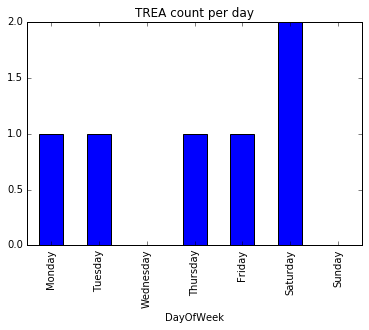

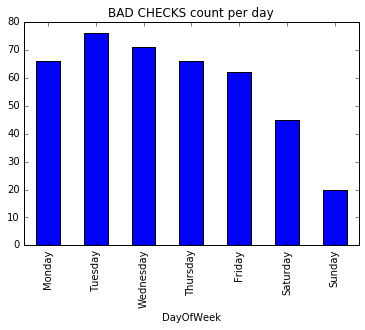

In [11]:
for i in categoryDayCV["Category"][:5]:
    dfCategory = df[df["Category"] == i]
    dfCat_grp = dfCategory.groupby('DayOfWeek')["Category"].count()
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dfCat_grp = dfCat_grp[weekdays]
    plt.figure()
    dfCat_grp.plot(kind='bar', title= i + ' count per day')